In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import FOLPSTracerPowerSpectrumMultipoles


theory = FOLPSTracerPowerSpectrumMultipoles(template = DirectPowerSpectrumTemplate(z = 1.45))

In [30]:
from desilike import plotting

In [3]:
theory.varied_params

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'])

In [3]:
path_pk = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_FOLPS/Fits_DESI_Y1_DELETE/DESI_bins/pk_HN/FOLPS_QSO_theory_z1.45_kmax0.32_ell024.txt'

pk_file = np.loadtxt(path_pk)
print(pk_file.shape)

path_cov = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_FOLPS/Fits_DESI_Y1_DELETE/DESI_bins/covariances/cov_gaussian_prerec_QSO_GCcomb_0.8_2.1_ell024.txt'

file2 = path_cov
covariance_data = np.loadtxt(file2)
print(covariance_data.shape)

(64, 4)
(192, 192)


In [4]:
def new_data(min_k, max_k, pk_data, covariance_data): #Función para establecer las dimensiones de los datos en función de los límites de k
    for i in range(len(pk_data[:,0:1])):
        if pk_data[:,0:1][i]==min_k:
            n = i
        if pk_data[:,0:1][i]==max_k:
            m = i
    p_subfile1 = pk_data[:,1:2][n:m+1]
    p_subfile2 = pk_data[:,2:3][n:m+1]
    p_subfile3 = pk_data[:,3:4][n:m+1]
    p_1 = np.vstack((p_subfile1,p_subfile2))
    p = np.vstack((p_1,p_subfile3))
    print('Dimensiones del vector de datos de multipolos: ', p.shape) #Creamos un vector con los datos de los 3 multipolos (p0,p2,p4)
    s = int(len(covariance_data[0])/3)
    mask1 = covariance_data[n:m+1, n:m+1]
    mask2 = covariance_data[n:m+1, n+s:m+1+s]
    mask3 = covariance_data[n:m+1, n+(2*s):m+1+(2*s)]
    mask4 = covariance_data[n+s:m+1+s, n:m+1]
    mask5 = covariance_data[n+s:m+1+s, n+s:m+1+s]
    mask6 = covariance_data[n+s:m+1+s, n+(2*s):m+1+(2*s)]
    mask7 = covariance_data[n+(2*s):m+1+(2*s), n:m+1]
    mask8 = covariance_data[n+(2*s):m+1+(2*s), n+s:m+1+s]
    mask9 = covariance_data[n+(2*s):m+1+(2*s), n+(2*s):m+1+(2*s)]
    h1 = np.hstack((mask1,mask2))
    h2 = np.hstack((h1, mask3))
    h3 = np.hstack((mask4, mask5))
    h4 = np.hstack((h3, mask6))
    h5 = np.hstack((mask7,mask8))
    h6 = np.hstack((h5, mask9))
    final1 = np.vstack((h2,h4))
    final = np.vstack((final1, h6))
    new_covariance = final
    print('Las dimensiones de la matriz de covarianza son: ', new_covariance.shape) #Creamos una matriz de covarianza nueva, eliminando los datos que exceden los límites de k
    return p, new_covariance

In [5]:
p, new_covariance = new_data(pk_file[:,0:1][4], pk_file[:,0:1][39], pk_file, covariance_data)

Dimensiones del vector de datos de multipolos:  (108, 1)
Las dimensiones de la matriz de covarianza son:  (108, 108)


In [25]:
new_covariance[:36,0:3]

array([[1680620.1738416 ,  219977.41912579,   18811.36373632],
       [ 219977.41912579, 1129533.84737246,  146960.79189197],
       [  18811.36373632,  146960.79189197,  716198.25170152],
       [   4090.74526236,   13067.71353083,   96222.78773215],
       [      0.        ,    2779.95686616,    8606.87689813],
       [      0.        ,       0.        ,    1941.04498054],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.   

In [10]:
covariance_data[4:40,4:7]

array([[1680620.1738416 ,  219977.41912579,   18811.36373632],
       [ 219977.41912579, 1129533.84737246,  146960.79189197],
       [  18811.36373632,  146960.79189197,  716198.25170152],
       [   4090.74526236,   13067.71353083,   96222.78773215],
       [      0.        ,    2779.95686616,    8606.87689813],
       [      0.        ,       0.        ,    1941.04498054],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.   

In [6]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
    data = p,
    covariance = new_covariance,
    klim={0: [0.02256549, 0.19751986, 0.0048], 2: [0.02256549, 0.19751986, 0.0048], 4:[0.02256549, 0.19751986, 0.0048]},
    theory = theory)

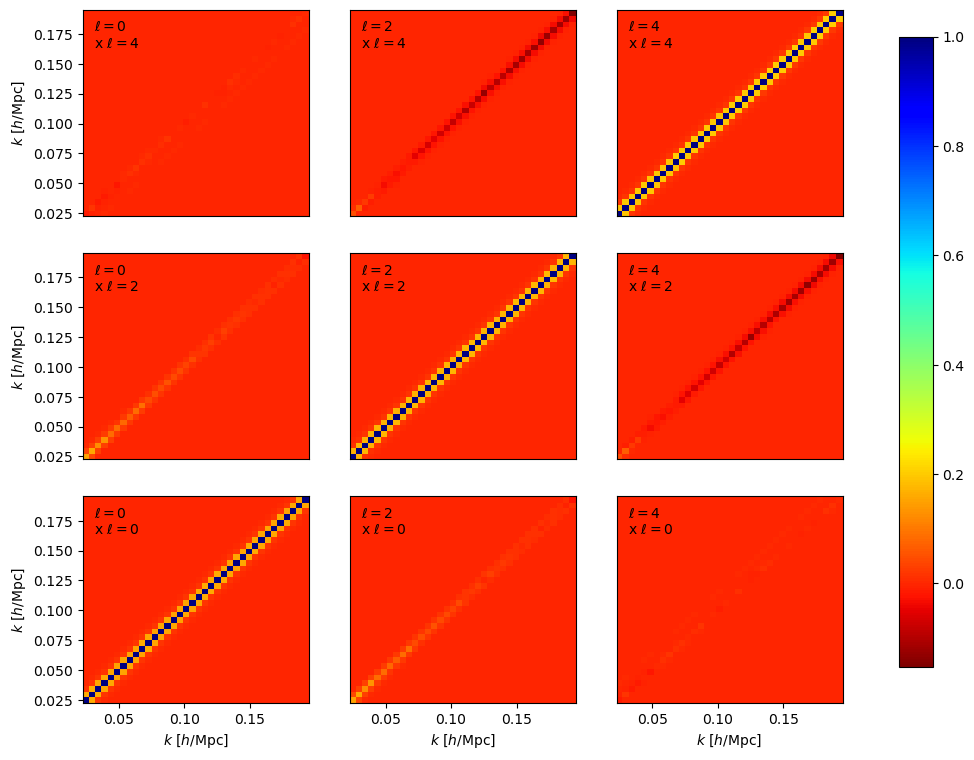

In [7]:
observable.plot_covariance_matrix();

In [8]:
from desilike.likelihoods import ObservablesGaussianLikelihood

likelihood = ObservablesGaussianLikelihood(observables = [observable], covariance = new_covariance)

In [9]:
from desilike import setup_logging
setup_logging()
likelihood()

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


Array(-5481.92861936, dtype=float64)

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed
[000037.68] [0/1] 04-16 12:54  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000037.68] [0/1] 04-16 12:54  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000039.34] [0/1] 04-16 12:54  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000047.57] [0/1] 04-16 12:54  Differentiation           INFO     Using finite-differentiation for parameter h.
[000049.22] [0/1] 04-16 12:54  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000050.84] [0/1] 04-16 12:54  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000052.46] [0/1] 04-16 12:54  Diffe

[<Figure size 600x600 with 2 Axes>]

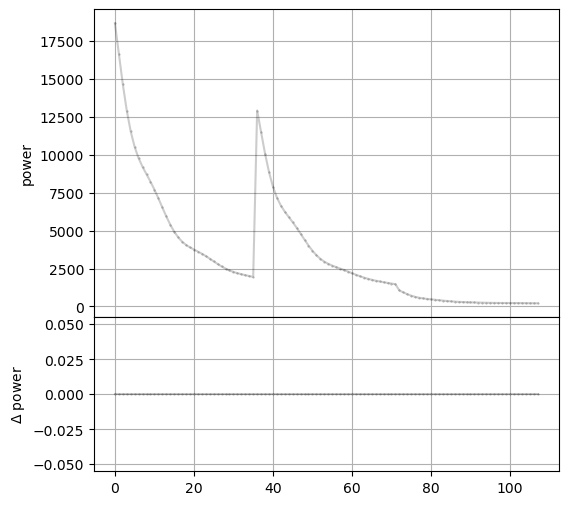

In [10]:
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine

emulator = Emulator(theory, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))
emulator.set_samples()
emulator.fit()
emulator.plot(name='power')

In [11]:
from desilike.samplers import EmceeSampler, ZeusSampler

In [44]:
observable.init.update(theory=emulator.to_calculator())

sampler = EmceeSampler(likelihood, save_fn = 'test_QSO_z1.45_full_modeling_v1_FOLPS', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

[000309.49] [0/1] 04-14 12:58  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000309.99] [0/1] 04-14 12:59  EmceeSampler              INFO     Successfully vmap input likelihood.
[000310.14] [0/1] 04-14 12:59  EmceeSampler              INFO     Successfully jit input likelihood.
[000310.36] [0/1] 04-14 12:59  TaskManager               INFO     Entering TaskManager with 1 workers.
[000313.71] [0/1] 04-14 12:59  Chain                     INFO     Saving test_QSO_z1.45_full_modeling_v1_FOLPS.
[000313.72] [0/1] 04-14 12:59  EmceeSampler              INFO     Diagnostics:
[000313.75] [0/1] 04-14 12:59  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 4.55; not < 0.15.
[000313.78] [0/1] 04-14 12:59  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.803.
[000314.00] [0/1] 04-14 12:59  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 

[Chain(shape=(6000, 30), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'b3', 'ct', 'loglikelihood', 'logprior']))]

In [45]:
chain = sampler.chains[0].remove_burnin(0.5)
print(chain.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.691  |  0.697  |  0.698  | 0.025  |  -0.025/+0.025  |  -0.019/+0.030  |
| omega_cdm | 0.1127  | 0.1138  | 0.1129  | 0.0089 | -0.0082/+0.0084 | -0.0096/+0.0065 |
|  omega_b  | 0.02230 | 0.02234 | 0.02233 | 3.8e-4 | -3.6e-4/+3.7e-4 | -3.4e-4/+3.8e-4 |
|   logA    |  3.13   |  3.05   |  3.04   |  0.15  |   -0.15/+0.15   |   -0.17/+0.11   |
|    b1     |  1.90   |  2.04   |  2.05   |  0.18  |   -0.18/+0.18   |   -0.11/+0.25   |
|    b2     |  -2.0   |  -0.7   |  -0.8   |  3.2   |    -3.3/+3.4    |    -2.8/+3.8    |
|    bs     |  11.3   |   5.0   |   4.8   |  6.6   |    -6.4/+6.7    |    -6.8/+6.3    |
|  alpha0   |   28    |   13    |   20.   |   71   |     -72/+66     |     -69/+68     |
|  alpha2   |    8   

In [12]:
%matplotlib inline
from desilike.samples import plotting

In [19]:
from desilike.samples import Chain
from desilike import setup_logging

setup_logging()
chain = Chain.load('test_QSO_z1.45_full_modeling_v1_FOLPS.npy').remove_burnin(0.3)
z = 1.45

[000000.00] [0/1] 04-16 12:01  Chain                     INFO     Loading test_QSO_z1.45_full_modeling_v1_FOLPS.npy.


In [22]:
plotting.plot_triangle(chain,labels = 'FOLPS',color = 'blue',show = True, filled = True, markers={'h': 0.7, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 3, 'b1':2 , 'b2': -0.7, 'bs':5,'alpha0':13,'alpha2':-9,'alpha4':-112,'sn0':0.25, 'sn2':-3.7});
plt.savefig('test_QSO_z1_45_full_modeling_v1_FOLPS')

Removed no burn in
[000209.76] [0/1] 04-16 12:05  root                      WARNING  auto bandwidth for h very small or failed (h=0.00029235848847096067,N_eff=126000.0). Using fallback (h=0.011824009918364277)
[000209.90] [0/1] 04-16 12:05  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.00028119680714910504,N_eff=126000.0). Using fallback (h=0.0121646192286043)
[000210.03] [0/1] 04-16 12:05  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.00028116105781744174,N_eff=126000.0). Using fallback (h=0.012682428017243357)
[000210.15] [0/1] 04-16 12:05  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0002832035402075361,N_eff=126000.0). Using fallback (h=0.012436133304742773)
[000210.26] [0/1] 04-16 12:05  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0002979504533299057,N_eff=126000.0). Using fallback (h=0.012823217395971625)
[000210.36] 

In [19]:
#likelihood(**sampler.chains[0].choice(params=likelihood.varied_params))
#observable.plot()
#plt.show()

In [21]:
from desilike.theories import Cosmoprimo
cosmo = Cosmoprimo()
print(cosmo.all_params)

cosmo.params = {'h': {'prior': {'limits': [0.5, 0.9]}},
                     'omega_b': {'prior': {'limits': [0.022, 0.02274]}},
                     'logA' : {'prior' : {'limits': [2,4]}},
                     'omega_cdm': {'prior': {'limits': [0.05,0.2]}}            
                     }

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k'])


In [12]:
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles
template = DirectPowerSpectrumTemplate(z=1.45)
theory2 = KaiserTracerPowerSpectrumMultipoles(template = template)

In [15]:
KaiserTracerPowerSpectrumMultipoles().varied_params

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'])

In [30]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
    data = p,
    covariance = new_covariance,
    klim={0: [0.02256549, 0.19751986, 0.0048], 2: [0.02256549, 0.19751986, 0.0048], 4:[0.02256549, 0.19751986, 0.0048]},
    theory = theory2)

In [31]:
likelihood2 = ObservablesGaussianLikelihood(observables = [observable], covariance = new_covariance)

In [32]:
setup_logging()
likelihood2()

Array(-5735.74336907, dtype=float64)

[000036.12] [0/1] 04-15 23:36  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000036.12] [0/1] 04-15 23:36  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000037.49] [0/1] 04-15 23:36  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000044.86] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter h.
[000046.35] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000047.87] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000049.32] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter logA.
[000049.39] [0/1] 04-15 23:36  Differentiation           INFO     Using auto-differentiation for parameter b1.
[000049.44] [0/1

[<Figure size 600x600 with 2 Axes>]

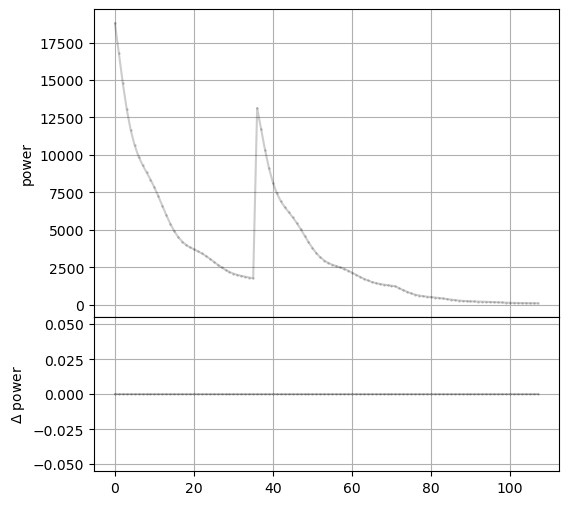

In [33]:
emulator2 = Emulator(theory2, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))  # order 2 except for sn0 (order 1 is enough)
emulator2.set_samples()
emulator2.fit()
emulator2.plot(name='power')

In [34]:
observable.init.update(theory=emulator2.to_calculator())

sampler2 = EmceeSampler(likelihood2, save_fn = 'test_QSO_z1.45_v1_fullmodeling_KAISER', seed=42)
sampler2.run(check={'max_eigen_gr': 0.15})

[000106.38] [0/1] 04-15 23:37  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000106.50] [0/1] 04-15 23:37  EmceeSampler              INFO     Successfully vmap input likelihood.
[000106.61] [0/1] 04-15 23:37  EmceeSampler              INFO     Successfully jit input likelihood.
[000106.78] [0/1] 04-15 23:37  TaskManager               INFO     Entering TaskManager with 1 workers.
[000108.78] [0/1] 04-15 23:37  Chain                     INFO     Saving test_QSO_z1.45_v1_fullmodeling_KAISER.
[000108.78] [0/1] 04-15 23:37  EmceeSampler              INFO     Diagnostics:
[000108.80] [0/1] 04-15 23:37  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 3.65; not < 0.15.
[000108.82] [0/1] 04-15 23:37  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 1.24.
[000108.96] [0/1] 04-15 23:37  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 1.19.
[000108.97] [0/1] 04-15 23:37 

[Chain(shape=(3900, 16), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'sigmapar', 'sigmaper', 'loglikelihood', 'logprior']))]

In [35]:
chain2 = sampler2.chains[0].remove_burnin(0.5)
print(chain2.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.646  |  0.646  |  0.646  | 0.019  |  -0.019/+0.019  |  -0.020/+0.017  |
| omega_cdm | 0.1077  | 0.1083  | 0.1084  | 0.0043 | -0.0043/+0.0043 | -0.0041/+0.0044 |
|  omega_b  | 0.02224 | 0.02228 | 0.02229 | 3.5e-4 | -3.5e-4/+3.5e-4 | -3.8e-4/+3.2e-4 |
|   logA    |  2.546  |  2.551  |  2.549  | 0.072  |  -0.072/+0.072  |  -0.076/+0.068  |
|    b1     |  2.817  |  2.804  |  2.805  | 0.073  |  -0.074/+0.074  |  -0.067/+0.079  |
|    sn0    |  0.136  |  0.135  |  0.135  | 0.012  |  -0.012/+0.012  |  -0.011/+0.013  |
+-----------+---------+---------+---------+--------+-----------------+-----------------+


In [36]:
%matplotlib inline

In [37]:
plotting.plot_triangle(chain2,labels = 'KAISER', markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v1_KAISER')

Removed no burn in
[000269.96] [0/1] 04-15 23:40  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0007555877613420839,N_eff=31200.0). Using fallback (h=0.01705997242122773)
[000270.06] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[000270.16] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[000270.22] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[000270.27] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[000270.34] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, sn0
[000270.40] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: omega_cdm, omega_b
[000270.45] [0/1] 04-15 

In [38]:
observable.init.update(theory=emulator2.to_calculator())

sampler3 = EmceeSampler(likelihood2, save_fn = 'test_QSO_z1.45_v2_fullmodeling_KAISER', seed=42)
sampler3.run(check={'max_eigen_gr': 0.05})

[000388.03] [0/1] 04-15 23:42  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000388.09] [0/1] 04-15 23:42  EmceeSampler              INFO     Successfully vmap input likelihood.
[000388.20] [0/1] 04-15 23:42  EmceeSampler              INFO     Successfully jit input likelihood.
[000388.36] [0/1] 04-15 23:42  TaskManager               INFO     Entering TaskManager with 1 workers.
[000390.47] [0/1] 04-15 23:42  Chain                     INFO     Saving test_QSO_z1.45_v2_fullmodeling_KAISER.
[000390.48] [0/1] 04-15 23:42  EmceeSampler              INFO     Diagnostics:
[000390.50] [0/1] 04-15 23:42  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 3.65; not < 0.05.
[000390.52] [0/1] 04-15 23:42  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 1.24.
[000390.64] [0/1] 04-15 23:42  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 1.19.
[000390.65] [0/1] 04-15 23:42 

[Chain(shape=(7800, 16), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'sigmapar', 'sigmaper', 'loglikelihood', 'logprior']))]

In [39]:
chain3 = sampler3.chains[0].remove_burnin(0.5)
print(chain3.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.648  |  0.648  |  0.647  | 0.019  |  -0.019/+0.019  |  -0.020/+0.018  |
| omega_cdm | 0.1080  | 0.1081  | 0.1081  | 0.0044 | -0.0044/+0.0044 | -0.0046/+0.0043 |
|  omega_b  | 0.02231 | 0.02227 | 0.02227 | 3.5e-4 | -3.5e-4/+3.4e-4 | -3.4e-4/+3.5e-4 |
|   logA    |  2.550  |  2.552  |  2.553  | 0.073  |  -0.075/+0.073  |  -0.072/+0.075  |
|    b1     |  2.803  |  2.802  |  2.802  | 0.072  |  -0.071/+0.072  |  -0.071/+0.072  |
|    sn0    |  0.137  |  0.135  |  0.135  | 0.012  |  -0.012/+0.012  |  -0.012/+0.012  |
+-----------+---------+---------+---------+--------+-----------------+-----------------+


In [40]:
plotting.plot_triangle(chain3,labels = 'KAISER', markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v2_KAISER')

Removed no burn in
[000464.31] [0/1] 04-15 23:43  root                      WARNING  auto bandwidth for logA very small or failed (h=0.000772568294742381,N_eff=62400.0). Using fallback (h=0.013628115540726484)
[000464.34] [0/1] 04-15 23:43  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0007037753693428905,N_eff=62400.0). Using fallback (h=0.014319166306533376)
[000464.41] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[000464.47] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[000464.53] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[000464.59] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[000464.65] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enoug

In [44]:
from desilike.samples import Chain

chain = Chain.load('test_QSO_z1.45_full_modeling_v1_FOLPS.npy').remove_burnin(0.3)
z = 1.45

[000909.61] [0/1] 04-15 23:50  Chain                     INFO     Loading test_QSO_z1.45_full_modeling_v1_FOLPS.npy.


Removed no burn in
[001197.18] [0/1] 04-15 23:55  root                      WARNING  auto bandwidth for logA very small or failed (h=0.000772568294742381,N_eff=62400.0). Using fallback (h=0.013628115540726484)
[001197.22] [0/1] 04-15 23:55  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0007037753693428905,N_eff=62400.0). Using fallback (h=0.014319166306533376)
[001197.30] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[001197.38] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[001197.45] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[001197.53] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[001197.60] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enoug

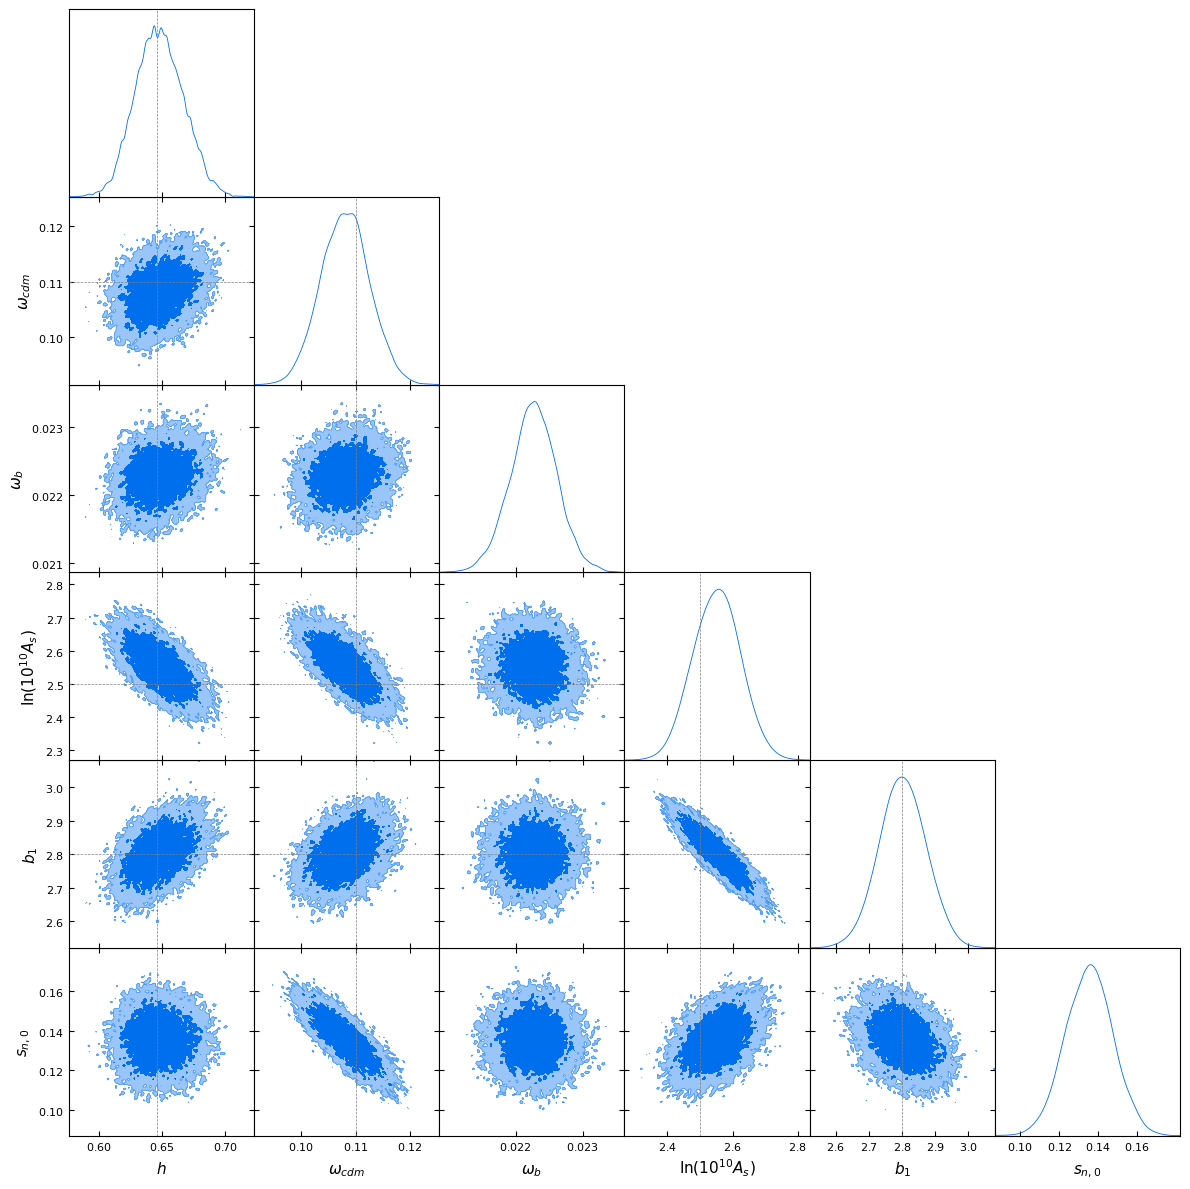

In [47]:
%matplotlib inline
plotting.plot_triangle(chain3,labels = 'KAISER',filled = True, markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v2_KAISER')

Removed no burn in
Removed no burn in
[001754.84] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for h very small or failed (h=0.00029235848847096067,N_eff=126000.0). Using fallback (h=0.011824009918364277)
[001754.93] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.00028119680714910504,N_eff=126000.0). Using fallback (h=0.0121646192286043)
[001755.02] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.00028116105781744174,N_eff=126000.0). Using fallback (h=0.012682428017243357)
[001755.06] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for logA very small or failed (h=0.000772568294742381,N_eff=62400.0). Using fallback (h=0.013628115540726484)
[001755.09] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0002832035402075361,N_eff=126000.0). Using fallback (h=0.0124361333047

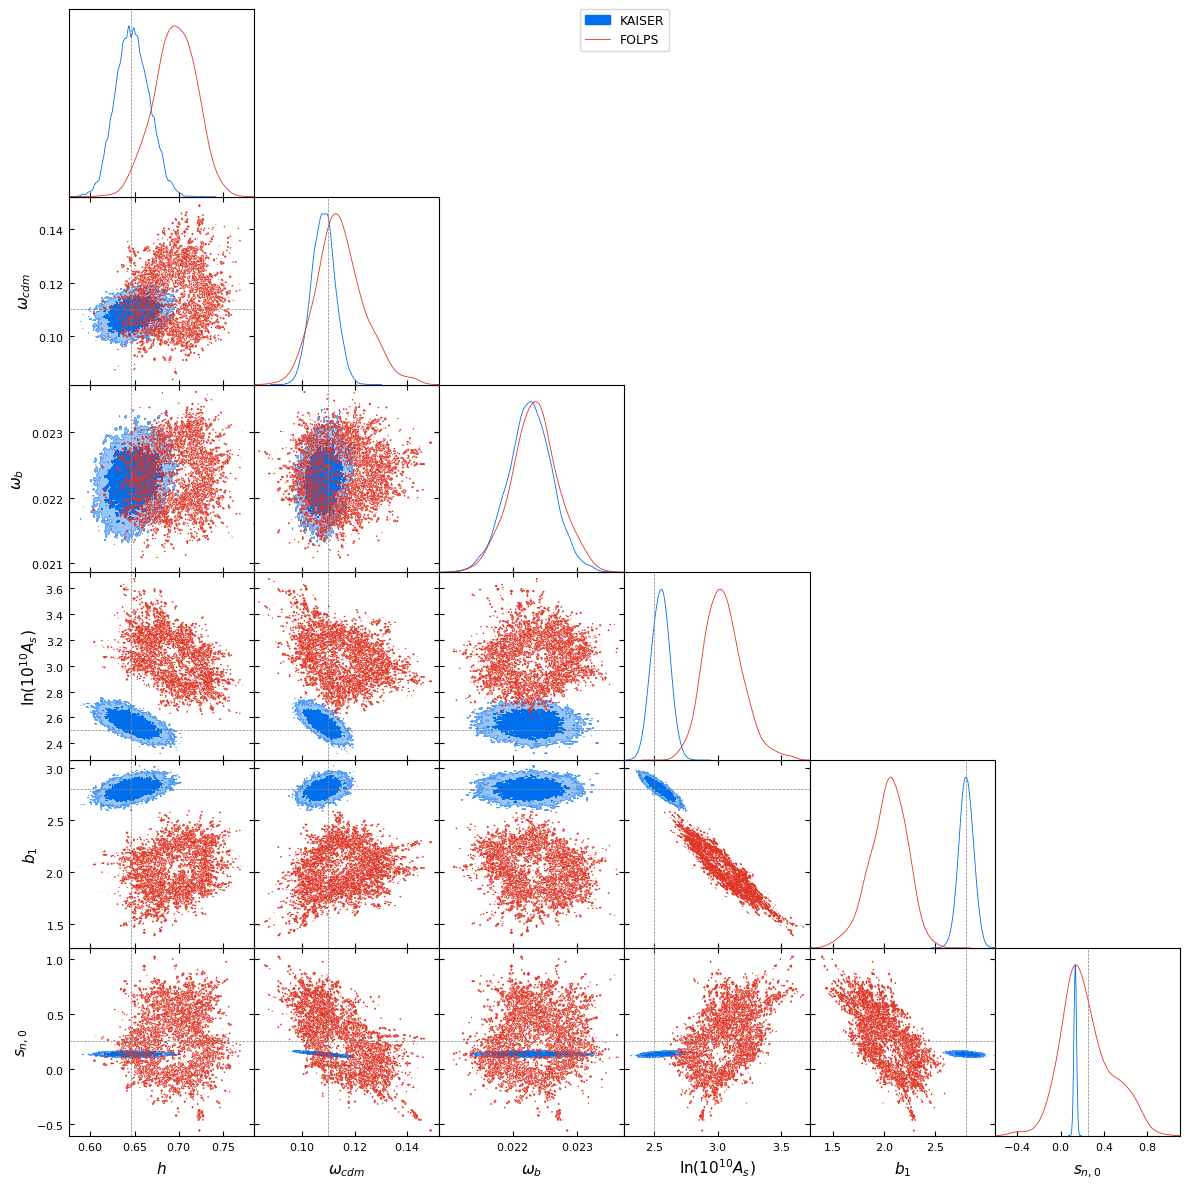

In [54]:
plotting.plot_triangle([chain3, chain],labels = ['KAISER','FOLPS'],filled = True, markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('Comparison_FOLPS_KAISER')

In [13]:
observable.init.update(theory=emulator.to_calculator())

sampler = EmceeSampler(likelihood, save_fn = 'test_QSO_z1.45_full_modeling_v2_FOLPS', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

[000152.75] [0/1] 04-16 12:56  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000153.18] [0/1] 04-16 12:56  EmceeSampler              INFO     Successfully vmap input likelihood.
[000153.34] [0/1] 04-16 12:56  EmceeSampler              INFO     Successfully jit input likelihood.
[000153.58] [0/1] 04-16 12:56  TaskManager               INFO     Entering TaskManager with 1 workers.
[000157.59] [0/1] 04-16 12:56  Chain                     INFO     Saving test_QSO_z1.45_full_modeling_v2_FOLPS.
[000157.59] [0/1] 04-16 12:56  EmceeSampler              INFO     Diagnostics:
[000157.63] [0/1] 04-16 12:56  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 7.65; not < 0.15.
[000157.67] [0/1] 04-16 12:56  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.111.
[000157.88] [0/1] 04-16 12:56  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 

[Chain(shape=(17100, 30), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'b3', 'ct', 'loglikelihood', 'logprior']))]

In [14]:
chain4 = sampler.chains[0].remove_burnin(0.5)
print(chain4.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.680  |  0.703  |  0.699  | 0.040  |  -0.036/+0.033  |  -0.041/+0.026  |
| omega_cdm | 0.1148  | 0.1098  | 0.1100  | 0.0092 | -0.0086/+0.0092 | -0.0082/+0.0094 |
|  omega_b  | 0.02227 | 0.02241 | 0.02242 | 3.9e-4 | -3.9e-4/+3.9e-4 | -3.7e-4/+4.1e-4 |
|   logA    |  3.11   |  3.08   |  3.09   |  0.22  |   -0.15/+0.18   |   -0.16/+0.16   |
|    b1     |  1.99   |  2.02   |  2.01   |  0.28  |   -0.22/+0.19   |   -0.19/+0.21   |
|    b2     |   1.6   |  -0.6   |  -0.1   |  4.3   |    -5.0/+4.4    |    -2.9/+6.0    |
|    bs     |  -5.9   |  -0.1   |  -0.8   |  8.5   |    -8.9/+9.5    |   -11.8/+5.8    |
|  alpha0   |   -29   |   -9    |  -10.   |   69   |     -65/+71     |     -69/+67     |
|  alpha2   |   -24  

In [16]:
plotting.plot_triangle(chain4,labels = 'FOLPS',filled = True, markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v2_FOLPS')

Removed no burn in
[000499.10] [0/1] 04-16 13:02  root                      WARNING  auto bandwidth for h very small or failed (h=0.000236243611018243,N_eff=256500.0). Using fallback (h=0.009759891714649973)
[000499.25] [0/1] 04-16 13:02  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.00024235834564967807,N_eff=256500.0). Using fallback (h=0.011024818953683665)
[000499.40] [0/1] 04-16 13:02  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.0002431456515554014,N_eff=256500.0). Using fallback (h=0.011579678349691412)
[000499.71] [0/1] 04-16 13:02  root                      WARNING  auto bandwidth for logA very small or failed (h=0.00024310699393150745,N_eff=256500.0). Using fallback (h=0.00842271922969418)
[000499.83] [0/1] 04-16 13:02  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0002456148950197676,N_eff=256500.0). Using fallback (h=0.009051502474115668)
[000499.95] [

In [18]:
from desilike.samples import Chain

chain_kaiser = Chain.load('test_QSO_z1.45_v2_fullmodeling_KAISER.npy').remove_burnin(0.3)
z = 1.45

[000644.88] [0/1] 04-16 13:04  Chain                     INFO     Loading test_QSO_z1.45_v2_fullmodeling_KAISER.npy.


In [22]:
plotting.plot_triangle([chain_kaiser, chain4],labels = ['KAISER','FOLPS'], filled = True, markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('Comparison_FOLPS_KAISER')


Removed no burn in
Removed no burn in
[000834.49] [0/1] 04-16 13:07  root                      WARNING  auto bandwidth for h very small or failed (h=0.000236243611018243,N_eff=256500.0). Using fallback (h=0.009759891714649973)
[000834.60] [0/1] 04-16 13:07  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.00024235834564967807,N_eff=256500.0). Using fallback (h=0.011024818953683665)
[000834.71] [0/1] 04-16 13:07  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.0002431456515554014,N_eff=256500.0). Using fallback (h=0.011579678349691412)
[000834.76] [0/1] 04-16 13:07  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0008967726724607425,N_eff=87360.0). Using fallback (h=0.012682559240574045)
[000834.81] [0/1] 04-16 13:07  root                      WARNING  auto bandwidth for logA very small or failed (h=0.00024310699393150745,N_eff=256500.0). Using fallback (h=0.008422719229

In [24]:
plotting.plot_triangle?

Signature:
plotting.plot_triangle(
    samples,
    params=None,
    labels=None,
    g=None,
    contour_colors=None,
    contour_ls=None,
    filled=False,
    legend_ncol=None,
    legend_loc=None,
    **kwargs,
)
Docstring:
Triangle plot.
*GetDist* package is used to plot chains.
If :class:`Profiles` are provided, requires :attr:`Profiles.profile` (or :attr:`Profiles.bestfit` and :attr:`Profiles.error` or :attr:`Profiles.covariance` for Gaussian approximation)
and :attr:`Profiles.contour` (or :attr:`Profiles.bestfit` and :attr:`Profiles.covariance` for Gaussian approximation).

Parameters
----------
samples : list, default=None
    List of (or single) :class:`Chain`, :class:`Profiles` or :class:`LikelihoodFisher` instance(s).

params : list, ParameterCollection, default=None
    Parameters to plot distribution for.
    Defaults to varied and not derived parameters.

labels : str, list, default=None
    Name for  *GetDist* to use for input samples.

fn : str, Path, default=None
    

In [27]:
%matplotlib inline

Removed no burn in
[001246.17] [0/1] 04-16 13:14  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm


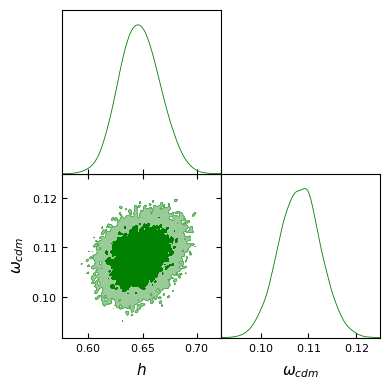

In [32]:
plotting.plot_triangle(chain_kaiser, params = ['h','omega_cdm'], filled = True, contour_ls = '-', contour_colors = 'green');

In [38]:
chain_kaiser_2 = Chain.load('test_QSO_z1.45_v2_fullmodeling_KAISER.npy')

[001427.71] [0/1] 04-16 13:17  Chain                     INFO     Loading test_QSO_z1.45_v2_fullmodeling_KAISER.npy.


Removed no burn in
[001464.11] [0/1] 04-16 13:18  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm


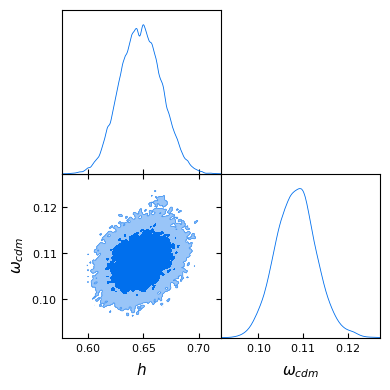

In [41]:
plotting.plot_triangle(chain_kaiser_2, filled = True, params = ['h','omega_cdm'], contour_ls = '-');

In [49]:
observable_test = TracerPowerSpectrumMultipolesObservable(
    data = p,
    covariance = new_covariance,
    klim={0: [0.02256549, 0.19751986, 0.0048]},
    theory = theory)

In [51]:
likelihood_test = ObservablesGaussianLikelihood(observable = [observable_test])

In [ ]:
observable_test.plot()